In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/archive (11).zip')
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [20]:
print(df.shape)
print(df.describe)
print(df.info)
print(df.dtypes)
print(df.corr(numeric_only=True))
print(df.columns)

(74, 20)
<bound method NDFrame.describe of     match_id           date                                         venue  \
0          1  March 26,2022                      Wankhede Stadium, Mumbai   
1          2  March 27,2022                     Brabourne Stadium, Mumbai   
2          3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3          4  March 28,2022                      Wankhede Stadium, Mumbai   
4          5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   
..       ...            ...                                           ...   
69        70    May 22,2022                      Wankhede Stadium, Mumbai   
70        71    May 24,2022                         Eden Gardens, Kolkata   
71        72    May 25,2022                         Eden Gardens, Kolkata   
72        73    May 27,2022              Narendra Modi Stadium, Ahmedabad   
73        74    May 29,2022              Narendra Modi Stadium, Ahmedabad   

        team1      team2    stag

In [15]:
# Unique values count
print("\nUnique Values in Each Column:\n", df.nunique())



Unique Values in Each Column:
 match_id               74
date                   62
venue                   6
team1                   9
team2                   9
stage                   3
toss_winner            10
toss_decision           2
first_ings_score       55
first_ings_wkts        10
second_ings_score      50
second_ings_wkts       10
match_winner           10
won_by                  2
margin                 31
player_of_the_match    56
top_scorer             37
highscore              46
best_bowling           42
best_bowling_figure    51
dtype: int64


In [19]:
#valuecount
print(df.value_counts())
print(df.isnull().sum())
print(df.isna().sum())
print(df.duplicated().sum())


match_id  date           venue                                         team1      team2      stage  toss_winner  toss_decision  first_ings_score  first_ings_wkts  second_ings_score  second_ings_wkts  match_winner  won_by   margin  player_of_the_match  top_scorer        highscore  best_bowling        best_bowling_figure
1         March 26,2022  Wankhede Stadium, Mumbai                      Chennai    Kolkata    Group  Kolkata      Field          131               5                133                4                 Kolkata       Wickets  6       Umesh Yadav          MS Dhoni          50         Dwayne Bravo        3--20                  1
56        May 9,2022     Dr DY Patil Sports Academy, Mumbai            Kolkata    Mumbai     Group  Mumbai       Field          165               9                113                10                Kolkata       Runs     52      Jasprit Bumrah       Ishan Kishan      51         Jasprit Bumrah      5--10                  1
54        May 8,2022     Wa

In [28]:
print(df['toss_decision'].value_counts())
print(df['toss_winner'].value_counts())
print(df['venue'].value_counts())


toss_decision
Field    59
Bat      15
Name: count, dtype: int64
toss_winner
Gujarat      10
Hyderabad    10
Mumbai        9
Kolkata       8
Delhi         8
Banglore      8
Lucknow       7
Chennai       6
Punjab        4
Rajasthan     4
Name: count, dtype: int64
venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64


In [74]:
# Select both columns as a list and then apply value_counts to the resulting DataFrame
value_counts = df[['stage','team1', 'team2', 'toss_winner', 'second_ings_score','first_ings_score', 'highscore', 'player_of_the_match','won_by', 'best_bowling_figure', 'best_bowling','match_winner','margin' ]].value_counts()
print(value_counts)

stage    team1      team2      toss_winner  second_ings_score  first_ings_score  highscore  player_of_the_match  won_by   best_bowling_figure  best_bowling      match_winner  margin
Final    Gujarat    Rajasthan  Rajasthan    133                130               45         Hardik Pandya        Wickets  3--17                Hardik Pandya     Gujarat       7         1
Group    Kolkata    Lucknow    Lucknow      208                210               140        Quinton de Kock      Runs     3--20                Mohsin Khan       Lucknow       2         1
         Hyderabad  Rajasthan  Hyderabad    149                210               57         Sanju Samson         Runs     3--22                Yuzvendra Chahal  Rajasthan     61        1
                    Punjab     Hyderabad    160                157               49         Harpreet Brar        Wickets  3--26                Harpreet Brar     Punjab        5         1
                                            152                151    

In [45]:
value_counts=df['match_winner'].value_counts()
print(value_counts)

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64


In [49]:
value_counts=df['player_of_the_match'].value_counts()
print(value_counts)

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Umesh Yadav          2
Quinton de Kock      2
David Miller         2
Umran Malik          2
K L Rahul            2
Rahul Tripathi       2
Hardik Pandya        2
Jasprit Bumrah       2
Shubman Gill         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Avesh Khan           2
Dinesh Karthik       2
Virat Kohli          1
Rinku Singh          1
Kagiso Rabada        1
Harshal Patel        1
David Warner         1
Harpreet Brar        1
Tim David            1
Yashasvi Jaiswal     1
R Aswin              1
Andre Russell        1
Shardul Thakur       1
Trent Boult          1
Devon Conway         1
W. Saha              1
Mitchell Marsh       1
Mohsin Khan          1
Daniel Sams          1
Jonny Bairstow       1
Ruturaj Gaikwad      1
Rashid Khan          1
Suruakumar Yadav     1
Anuj Rawat           1
Odean Smith          1
Mohammed Shami       1
Sanju Samson         1
Evin Lewis           1
Lockie Ferguson      1
Liam Livingsto

In [50]:
value_counts=df['toss_winner'].value_counts()
print(value_counts)

toss_winner
Gujarat      10
Hyderabad    10
Mumbai        9
Kolkata       8
Delhi         8
Banglore      8
Lucknow       7
Chennai       6
Punjab        4
Rajasthan     4
Name: count, dtype: int64


In [51]:
value_counts=df['first_ings_score'].value_counts()
print(value_counts)

first_ings_score
177    3
169    3
210    3
189    3
207    2
165    2
144    2
151    2
168    2
159    2
193    2
157    2
158    2
195    2
192    2
153    1
173    1
170    1
202    1
146    1
152    1
143    1
131    1
176    1
208    1
97     1
209    1
133    1
178    1
150    1
188    1
160    1
155    1
187    1
68     1
205    1
128    1
137    1
171    1
180    1
161    1
149    1
154    1
215    1
162    1
216    1
198    1
175    1
199    1
217    1
181    1
115    1
222    1
156    1
130    1
Name: count, dtype: int64


In [54]:
value_counts=df['second_ings_score'].value_counts()
print(value_counts)


second_ings_score
161    4
155    4
133    3
160    3
190    3
170    3
173    2
176    2
186    2
193    2
162    2
152    2
189    2
208    2
132    2
157    2
117    1
158    1
145    1
172    1
101    1
125    1
137    1
113    1
151    1
142    1
103    1
123    1
174    1
154    1
82     1
156    1
150    1
199    1
149    1
211    1
141    1
126    1
171    1
168    1
181    1
210    1
163    1
119    1
179    1
207    1
148    1
72     1
115    1
191    1
Name: count, dtype: int64


In [56]:
value_counts=df['venue'].value_counts()
print(value_counts)

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64


In [58]:
value_counts=df['won_by'].value_counts()
print(value_counts)

won_by
Wickets    37
Runs       37
Name: count, dtype: int64


In [79]:
# Convert data types
df['toss_decision'] = df['toss_decision'].astype('category')
df['toss_winner'] = df['toss_winner'].astype('category')
df['venue'] = df['venue'].astype('category')
df['won_by'] = df['won_by'].astype('category')
df['best_bowling_figure'] = df['best_bowling_figure'].astype('category')
df['best_bowling'] = df['best_bowling'].astype('category')
df['match_winner'] = df['match_winner'].astype('category')
df['player_of_the_match'] = df['player_of_the_match'].astype('category')
df['stage'] = df['stage'].astype('category')
df['team1'] = df['team1'].astype('category')
df['team2'] = df['team2'].astype('category')
print(df.dtypes)
print(df['first_ings_wkts'])
print(df['second_ings_wkts'])
print(df['highscore'])
print(df['second_ings_score'])
print(df['first_ings_score'])
print(df['toss_decision'])
print(df['toss_winner'])
print(df['venue'])
print(df['won_by'])
print(df['best_bowling_figure'])
print(df['best_bowling'])
print(df['match_winner'])
print(df['player_of_the_match'])

match_id                  int64
date                     object
venue                  category
team1                  category
team2                  category
stage                  category
toss_winner            category
toss_decision          category
first_ings_score          int64
first_ings_wkts           int64
second_ings_score         int64
second_ings_wkts          int64
match_winner           category
won_by                 category
margin                    int64
player_of_the_match    category
top_scorer               object
highscore                 int64
best_bowling           category
best_bowling_figure    category
dtype: object
0     5
1     5
2     2
3     6
4     6
     ..
69    8
70    6
71    4
72    8
73    9
Name: first_ings_wkts, Length: 74, dtype: int64
0     4
1     6
2     5
3     5
4     7
     ..
69    5
70    3
71    6
72    3
73    3
Name: second_ings_wkts, Length: 74, dtype: int64
0      50
1      81
2      88
3      55
4      57
     ... 
69     49
70 

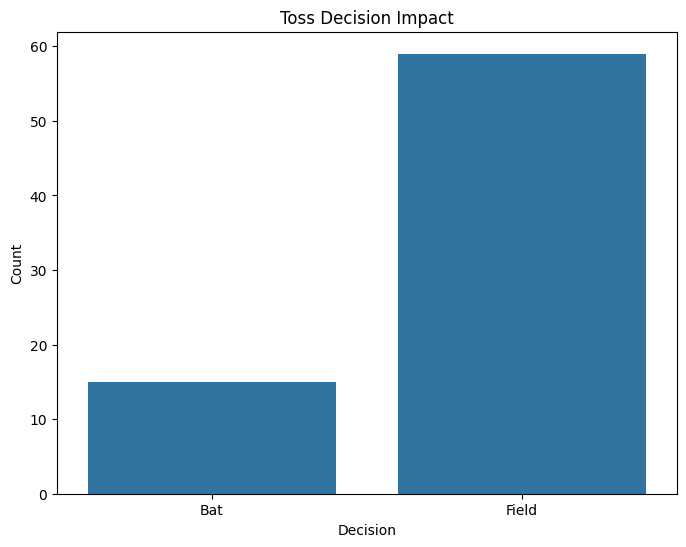

In [80]:
#data visulization
# Toss decision impact
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='toss_decision')
plt.title('Toss Decision Impact')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

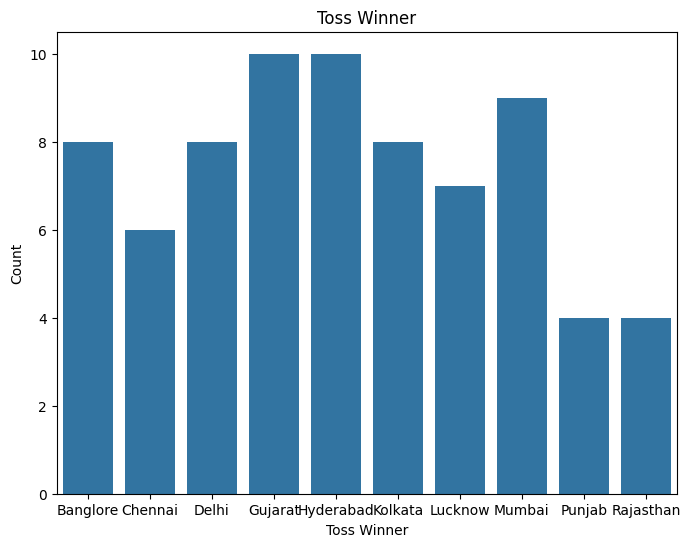

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='toss_winner')
plt.title('Toss Winner')
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.show()

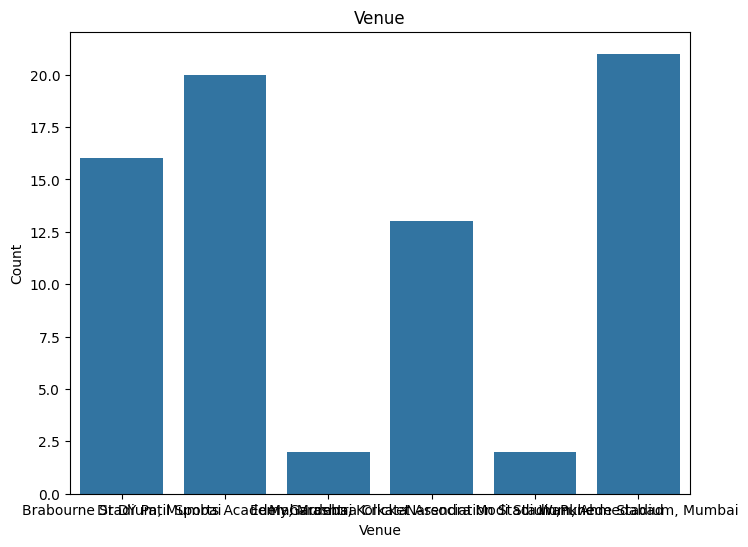

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='venue')
plt.title('Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.show()

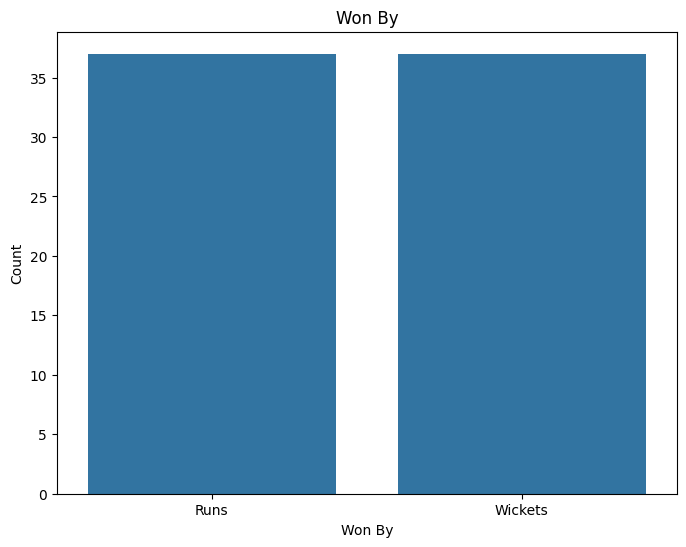

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='won_by')
plt.title('Won By')
plt.xlabel('Won By')
plt.ylabel('Count')
plt.show()

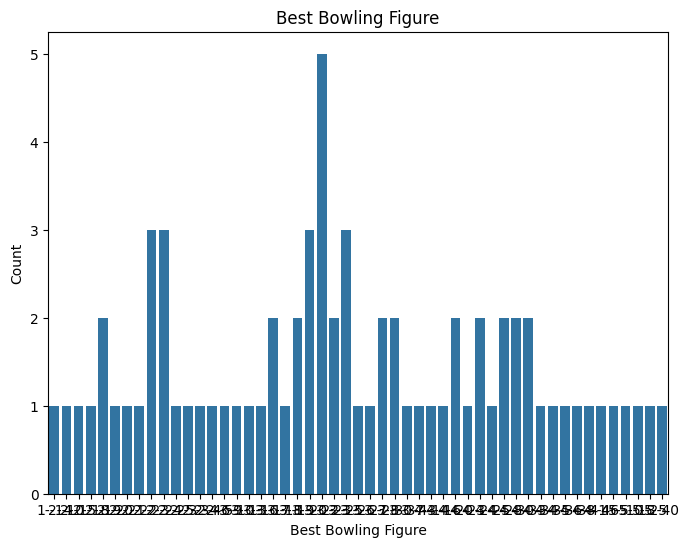

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='best_bowling_figure')
plt.title('Best Bowling Figure')
plt.xlabel('Best Bowling Figure')
plt.ylabel('Count')
plt.show()

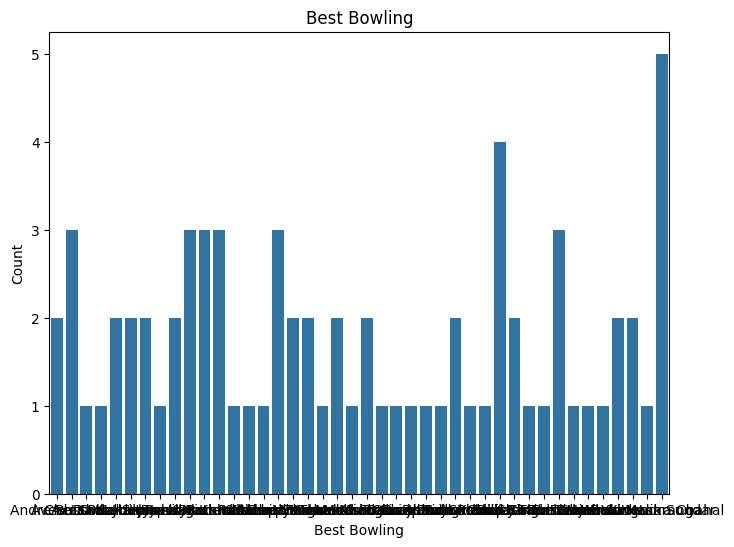

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='best_bowling')
plt.title('Best Bowling')
plt.xlabel('Best Bowling')
plt.ylabel('Count')
plt.show()

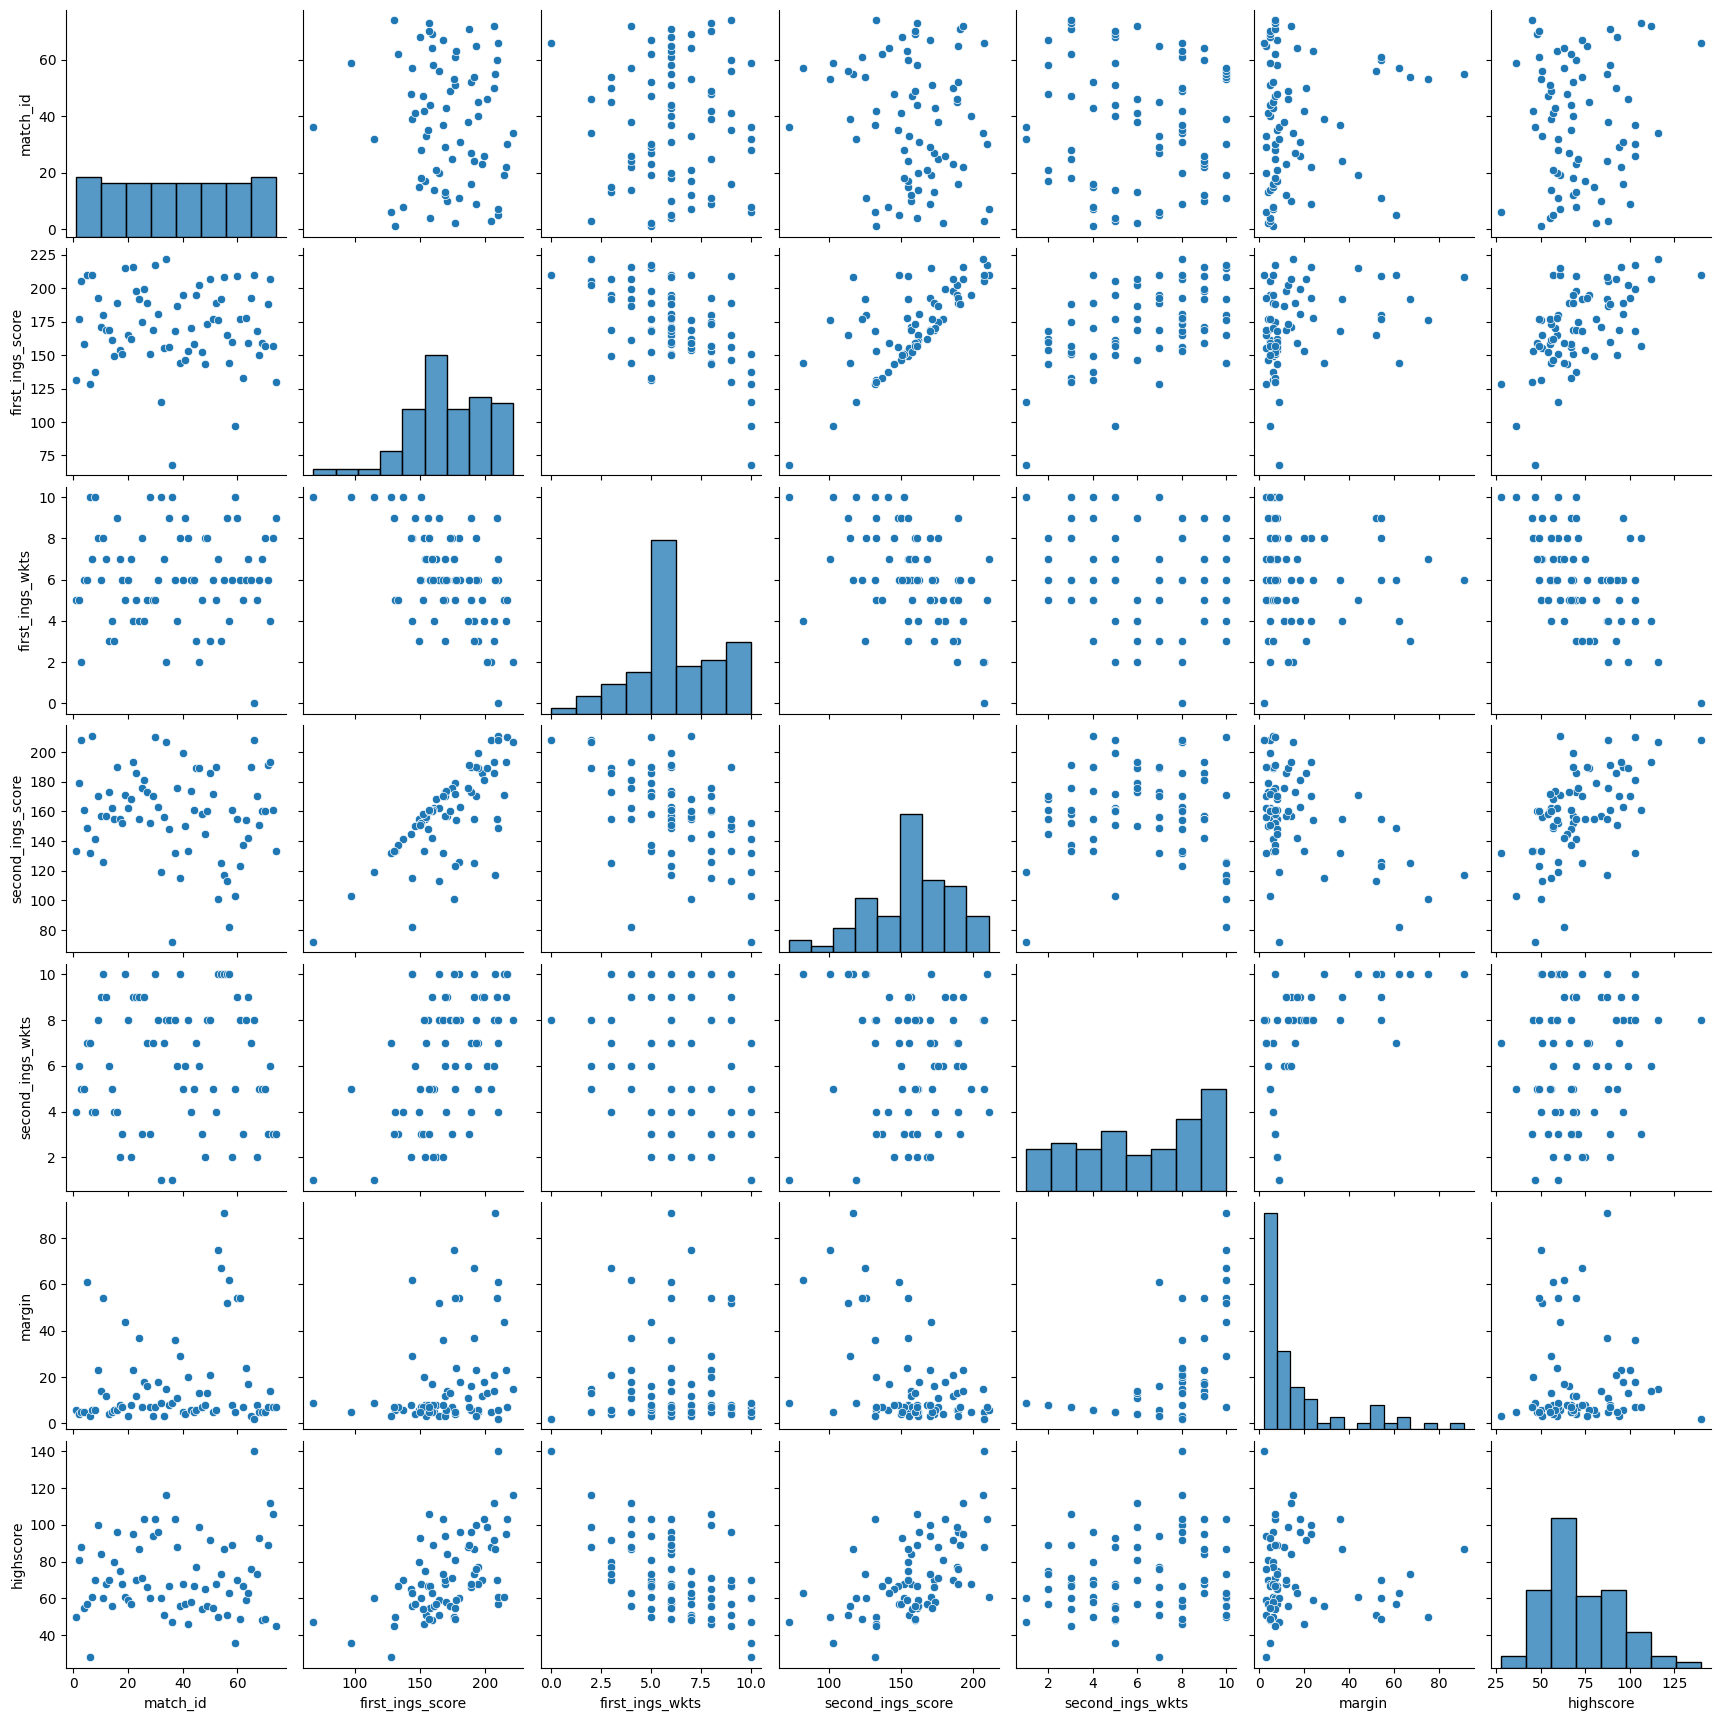

In [86]:
sns.pairplot(df)
plt.show()

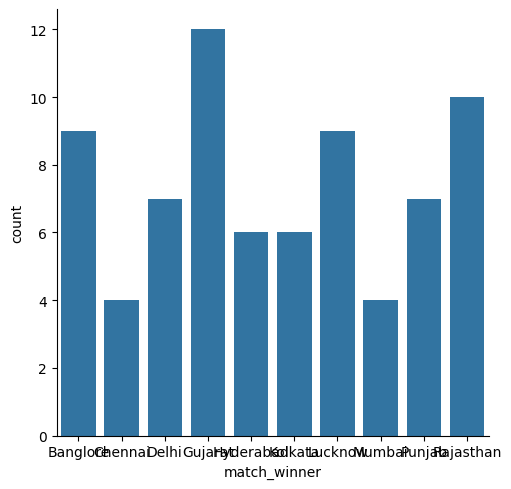

In [87]:
#catplot
sns.catplot(x='match_winner', kind='count', data=df)
plt.show()

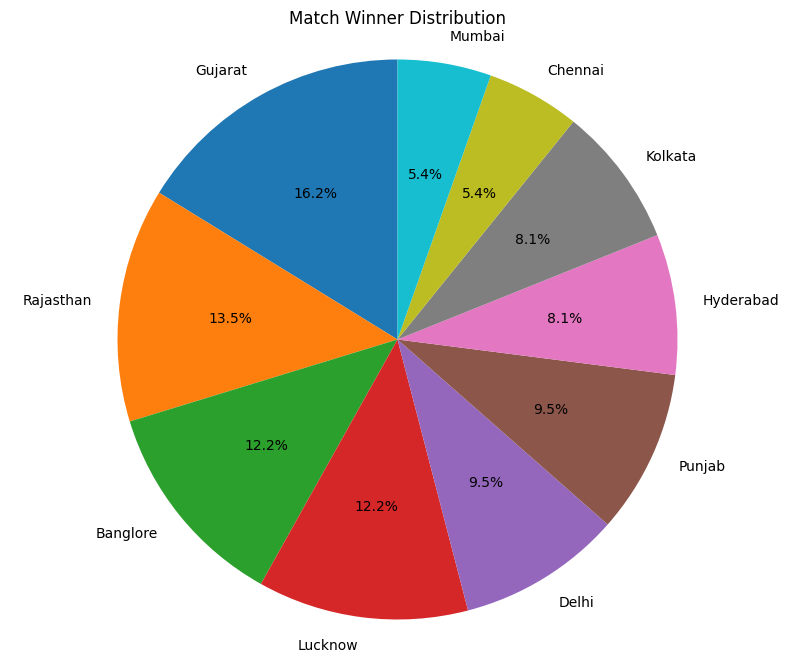

In [89]:
#piechart
# Pie chart for match winners
match_winner_counts = df['match_winner'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(match_winner_counts, labels=match_winner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Match Winner Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


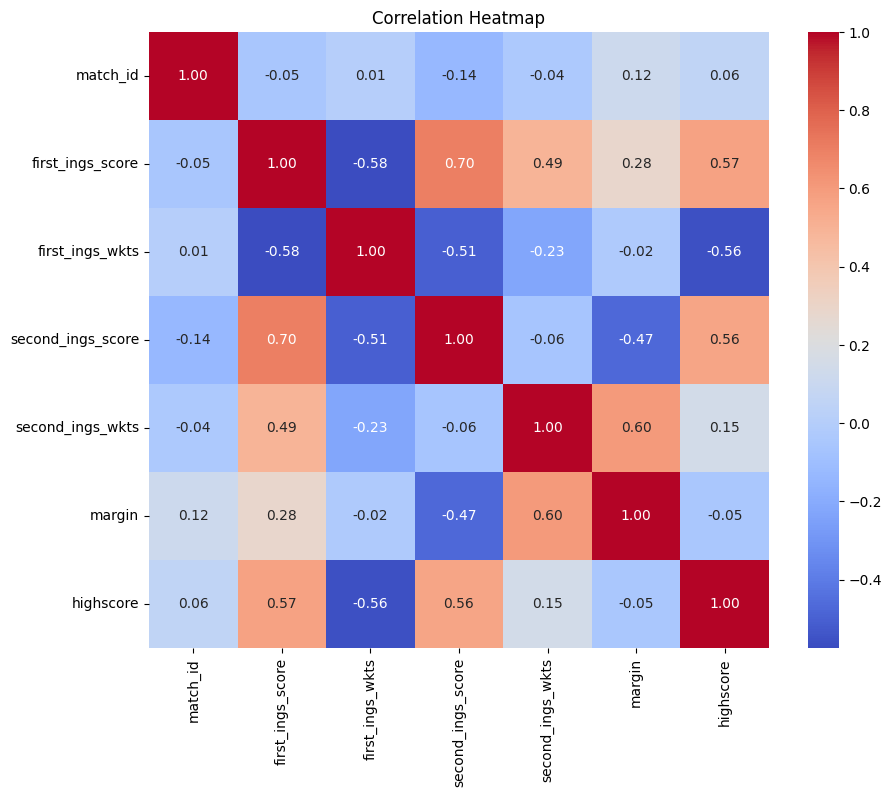

In [92]:
#heatmap
correlation_matrix = df.corr(numeric_only=True) # Corrected argument name to 'numeric_only'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

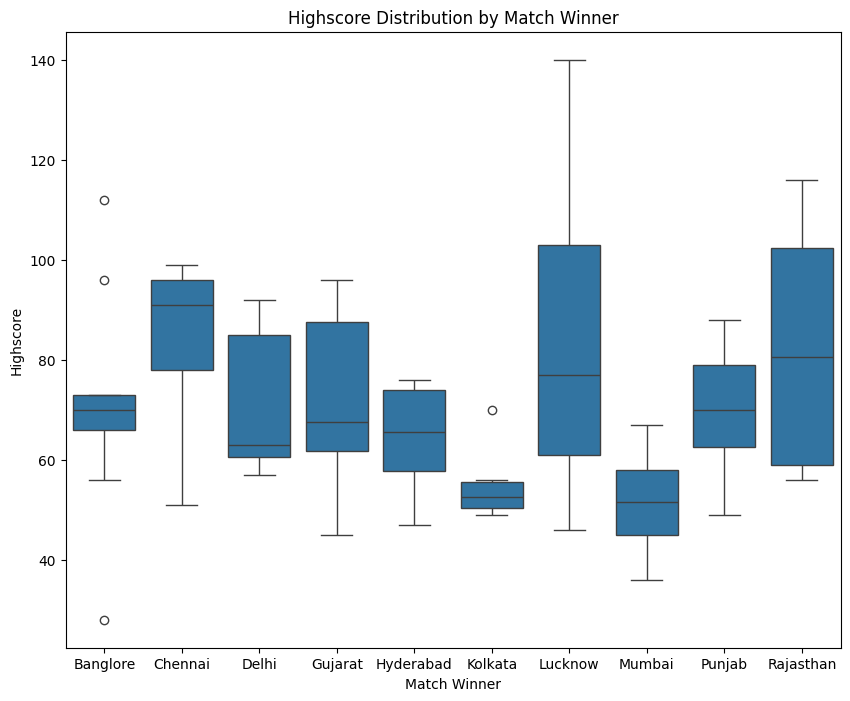

In [93]:
#boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='match_winner', y='highscore', data=df)
plt.title('Highscore Distribution by Match Winner')
plt.xlabel('Match Winner')
plt.ylabel('Highscore')
plt.show()

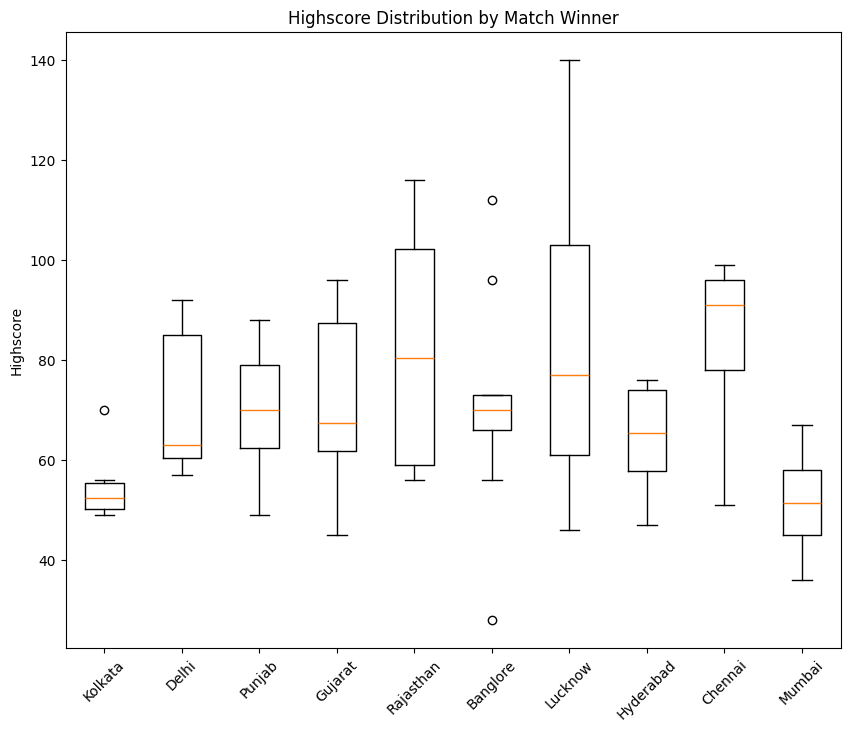

In [94]:
boxplot_data = [df[df['match_winner'] == team]['highscore'] for team in df['match_winner'].unique()]
plt.figure(figsize=(10, 8))
plt.boxplot(boxplot_data)
plt.xticks(range(1, len(df['match_winner'].unique()) + 1), df['match_winner'].unique(), rotation=45)
plt.title('Highscore Distribution by Match Winner')
plt.ylabel('Highscore')
plt.show()

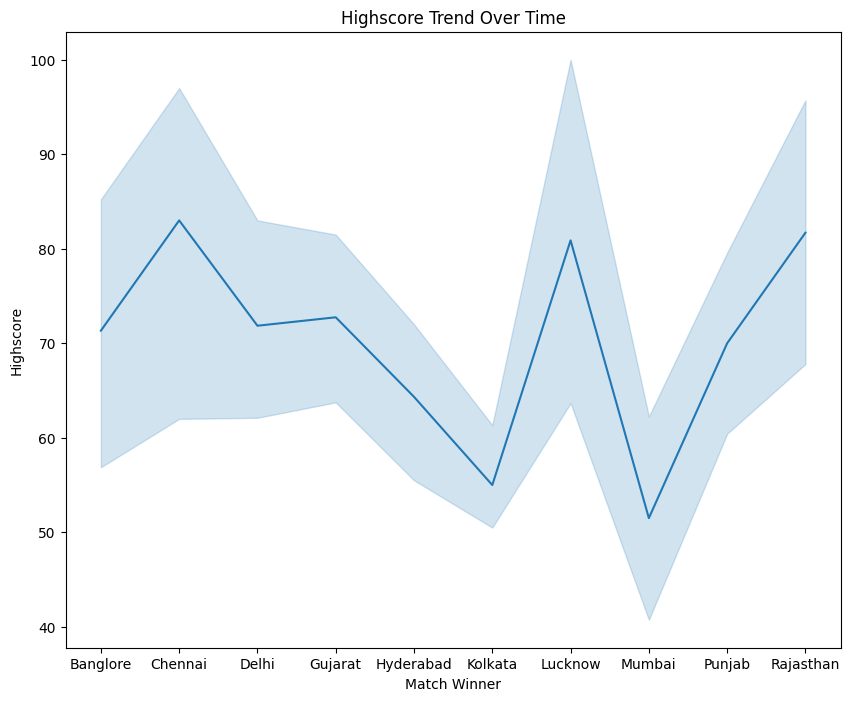

In [95]:
#linechart
plt.figure(figsize=(10, 8))
sns.lineplot(x='match_winner', y='highscore', data=df)
plt.title('Highscore Trend Over Time')
plt.xlabel('Match Winner')
plt.ylabel('Highscore')
plt.show()

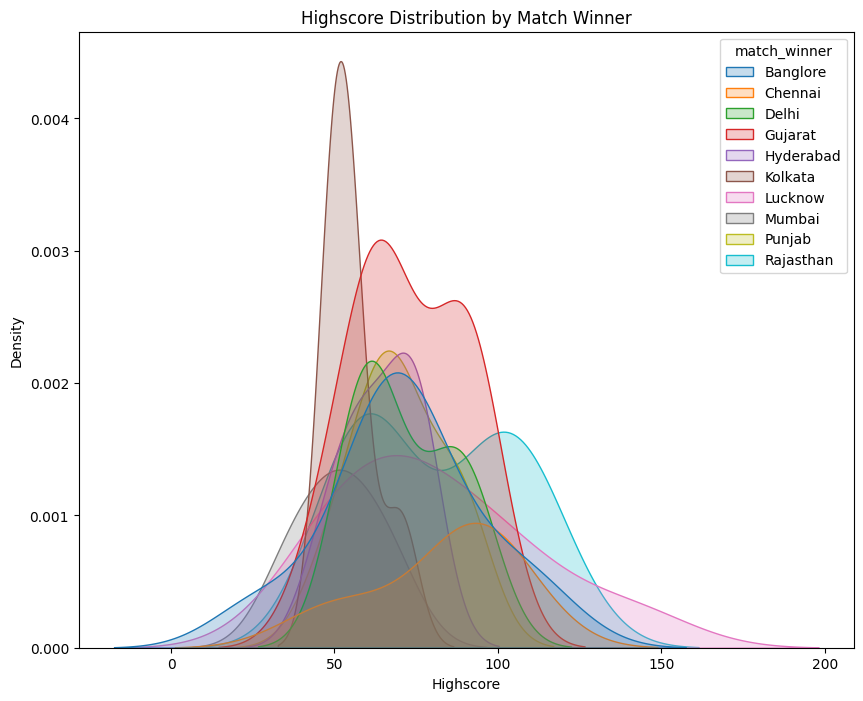

In [96]:
#kdeplot
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='highscore', hue='match_winner', fill=True)
plt.title('Highscore Distribution by Match Winner')
plt.xlabel('Highscore')
plt.ylabel('Density')
plt.show()

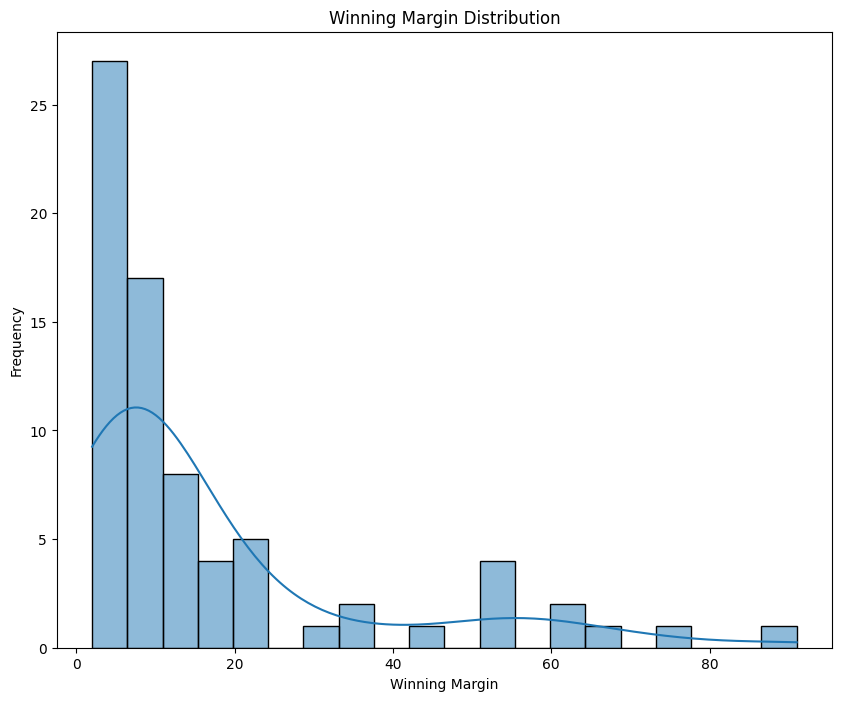

In [97]:
## Winning margin distribution
plt.figure(figsize=(10, 8))
sns.histplot(df['margin'], bins=20, kde=True)
plt.title('Winning Margin Distribution')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.show()

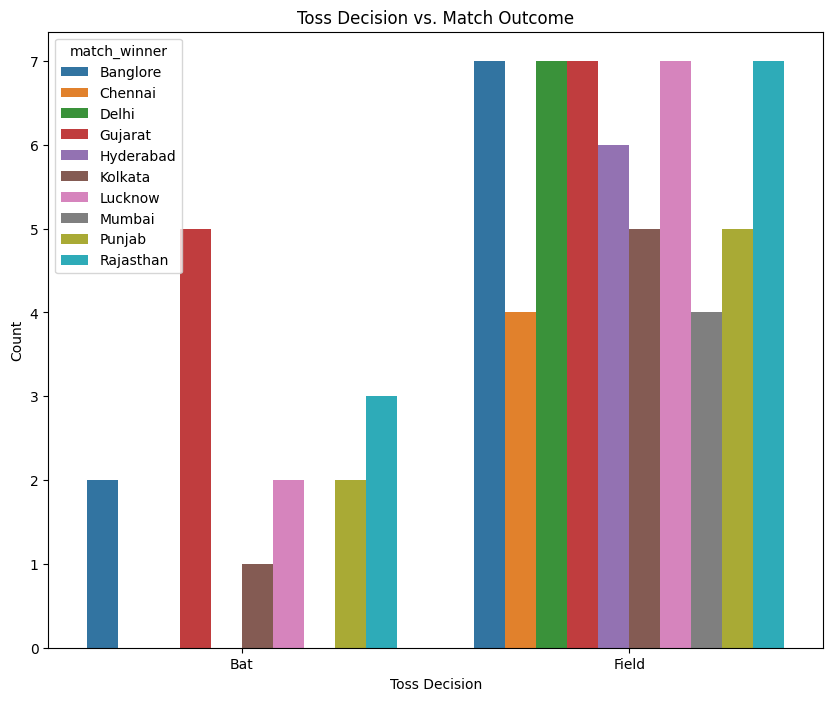

In [98]:
# Correlation between toss decision and match outcome
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='toss_decision', hue='match_winner')
plt.title('Toss Decision vs. Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

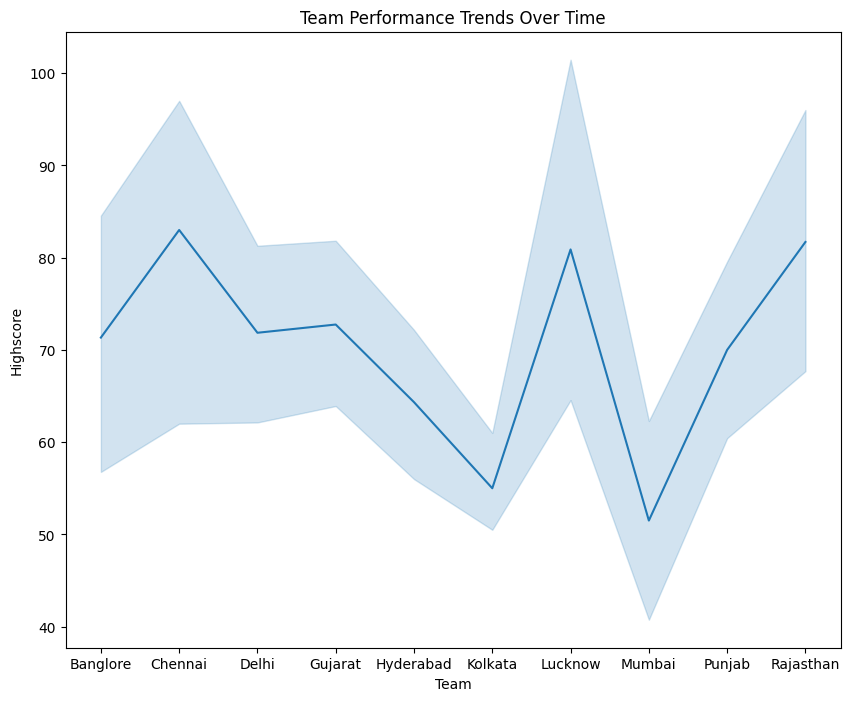

In [99]:
# Team performance trends over time
plt.figure(figsize=(10, 8))
sns.lineplot(x='match_winner', y='highscore', data=df)
plt.title('Team Performance Trends Over Time')
plt.xlabel('Team')
plt.ylabel('Highscore')
plt.show()

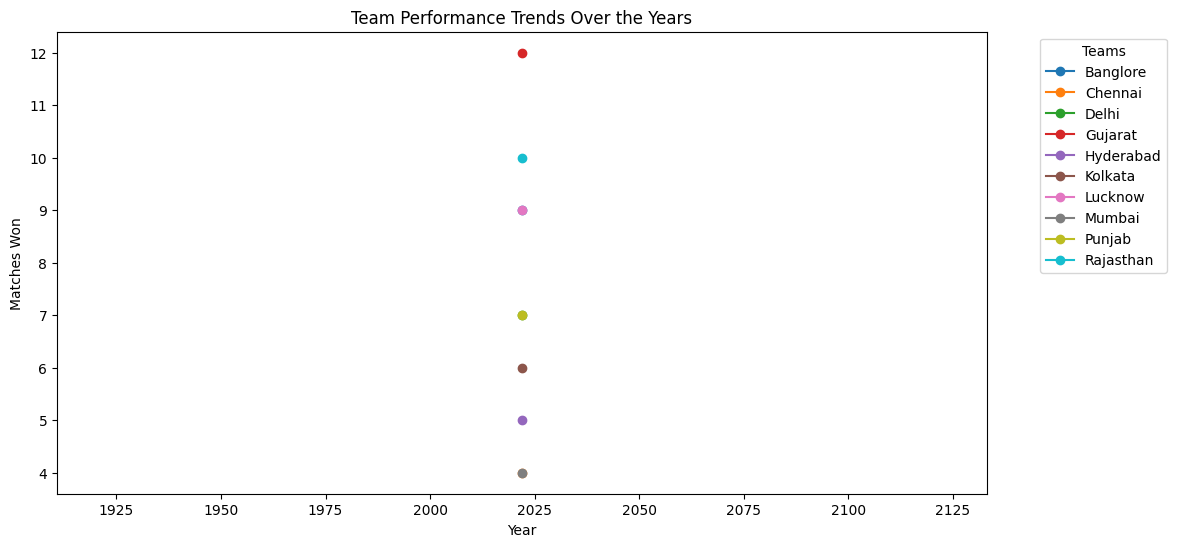

In [103]:
# Team performance trends over time
df['date'] = pd.to_datetime(df['date'], format='%B %d,%Y', errors='coerce')  # Specify format and handle errors
df['year'] = df['date'].dt.year
team_performance = df.groupby(['year', 'match_winner']).size().unstack().fillna(0)
team_performance.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Team Performance Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Matches Won')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

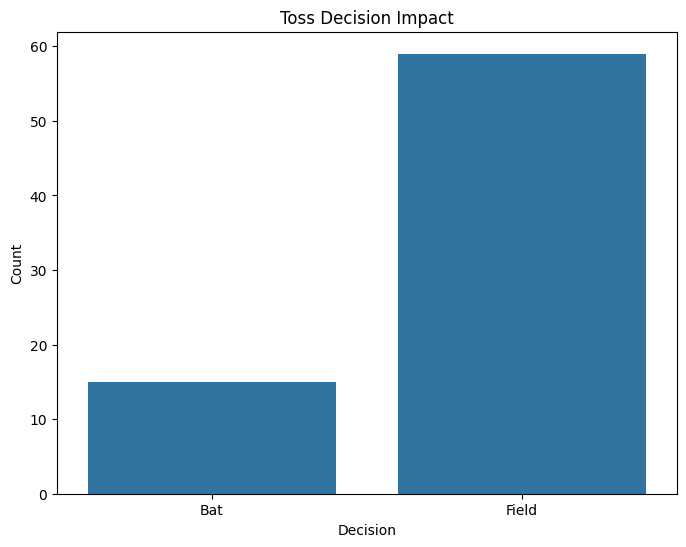

In [105]:
# Toss decision impact
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='toss_decision')
plt.title('Toss Decision Impact')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

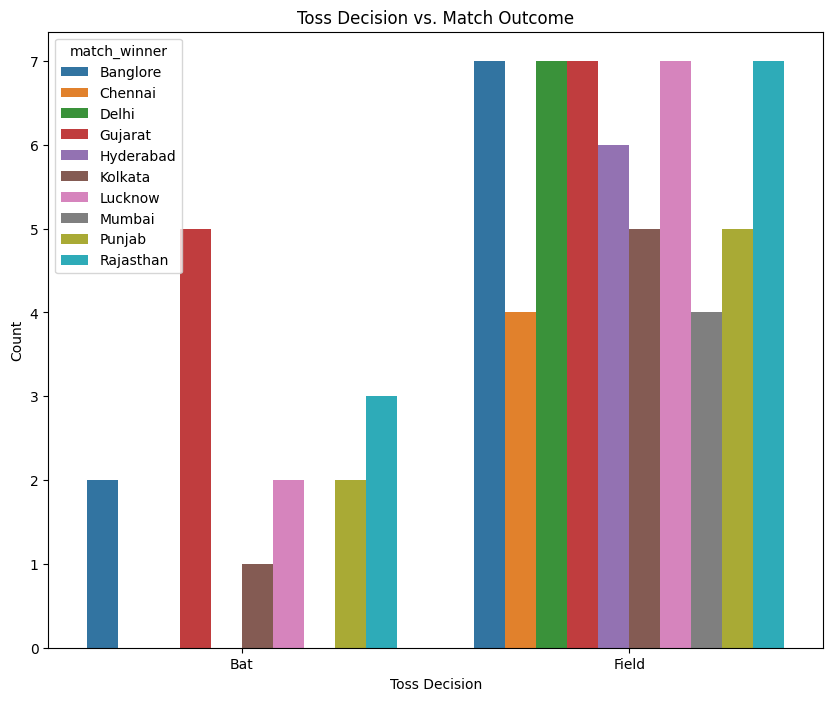

In [106]:
# Correlation between toss decision and match outcome
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='toss_decision', hue='match_winner')
plt.title('Toss Decision vs. Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

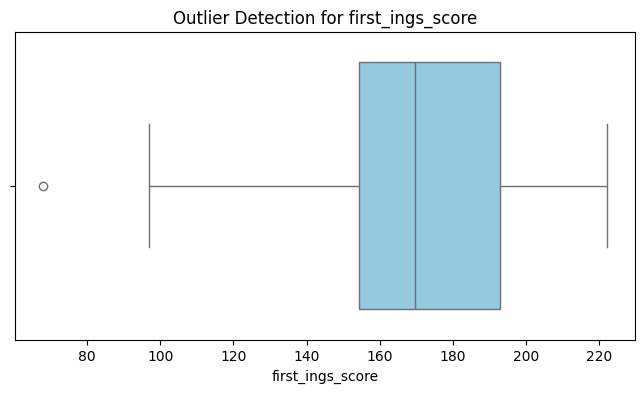

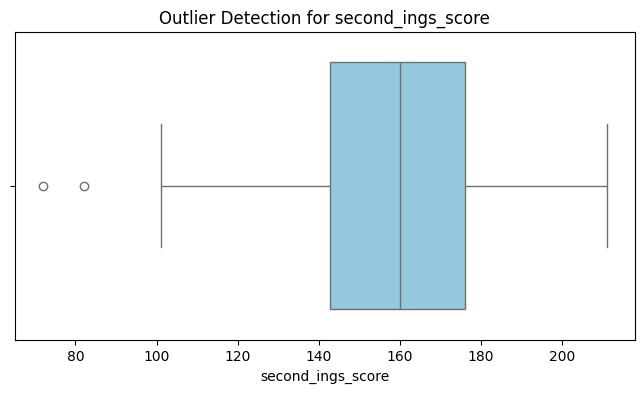

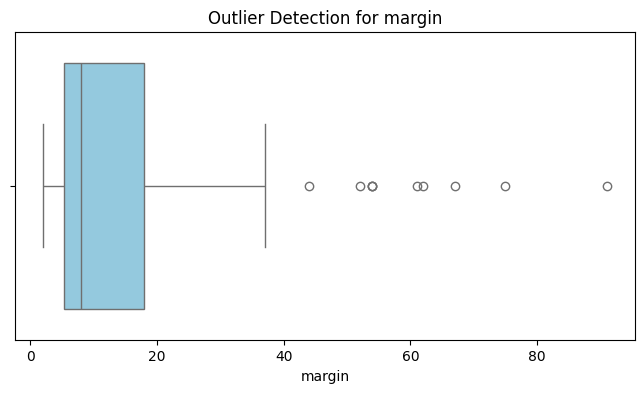

In [107]:
numeric_cols = ['first_ings_score', 'second_ings_score', 'margin']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection for {col}')
    plt.show()

In [108]:
# Identifying outliers using IQR
Q1 = df['first_ings_score'].quantile(0.25)
Q3 = df['first_ings_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['first_ings_score'] < lower_bound) | (df['first_ings_score'] > upper_bound)]
print("Outliers in 'first_ings_score':")
print(outliers)

Outliers in 'first_ings_score':
    match_id       date                      venue     team1      team2  \
35        36 2022-04-23  Brabourne Stadium, Mumbai  Banglore  Hyderabad   

    stage toss_winner toss_decision  first_ings_score  first_ings_wkts  ...  \
35  Group   Hyderabad         Field                68               10  ...   

    second_ings_wkts  match_winner   won_by margin  player_of_the_match  \
35                 1     Hyderabad  Wickets      9         Marco Jansen   

         top_scorer highscore  best_bowling best_bowling_figure    year  
35  Abhishek Sharma        47   T Natarajan               3--10  2022.0  

[1 rows x 21 columns]


In [109]:
print("\nDataset after outlier removal:")
print(df.describe())


Dataset after outlier removal:
        match_id                           date  first_ings_score  \
count  74.000000                             73         74.000000   
mean   37.500000  2022-04-25 01:58:21.369862912        171.121622   
min     1.000000            2022-03-26 00:00:00         68.000000   
25%    19.250000            2022-04-10 00:00:00        154.250000   
50%    37.500000            2022-04-25 00:00:00        169.500000   
75%    55.750000            2022-05-09 00:00:00        192.750000   
max    74.000000            2022-05-29 00:00:00        222.000000   
std    21.505813                            NaN         29.048355   

       first_ings_wkts  second_ings_score  second_ings_wkts     margin  \
count        74.000000          74.000000         74.000000  74.000000   
mean          6.135135         158.540541          6.175676  16.972973   
min           0.000000          72.000000          1.000000   2.000000   
25%           5.000000         142.750000         

In [112]:
df.corr(numeric_only=True)

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore,year
match_id,1.000000,-0.054985,0.008884,-0.137333,-0.035832,0.116010,0.055545,NaN
first_ings_score,-0.054985,1.000000,-0.575015,0.704237,0.489906,0.284043,0.573014,NaN
first_ings_wkts,0.008884,-0.575015,1.000000,-0.506816,-0.228227,-0.022183,-0.561732,NaN
second_ings_score,-0.137333,0.704237,-0.506816,1.000000,-0.061639,-0.471513,0.557783,NaN
second_ings_wkts,-0.035832,0.489906,-0.228227,-0.061639,1.000000,0.602431,0.147039,NaN
margin,0.116010,0.284043,-0.022183,-0.471513,0.602431,1.000000,-0.050959,NaN
highscore,0.055545,0.573014,-0.561732,0.557783,0.147039,-0.050959,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: Feature Engineering:

import pandas as pd
# Assuming 'df' is your DataFrame from the previous code

# Example 1: Creating a new feature 'total_score'
df['total_score'] = df['first_ings_score'] + df['second_ings_score']

# Example 2: Encoding categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['toss_decision', 'venue'], drop_first=True)

# Example 3:  Feature interaction (creating a new feature from two existing ones)
df['score_difference'] = abs(df['first_ings_score'] - df['second_ings_score'])

# Example 4:  Binning a numerical feature
df['first_ings_score_bins'] = pd.cut(df['first_ings_score'], bins=5, labels=False) # Creates 5 bins

# Example 5:  Scaling numerical features (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['first_ings_score', 'second_ings_score']] = scaler.fit_transform(df[['first_ings_score', 'second_ings_score']])

print(df.head())


In [122]:
# Feature Engineering
# 1. Total Score:
df['total_score'] = df['first_ings_score'] + df['second_ings_score']
## 2. Score Difference:
df['score_difference'] = abs(df['first_ings_score'] - df['second_ings_score'])
# 3. Win by Runs or Wickets (Binary):
df['win_by_runs'] = (df['won_by'] == 'runs').astype(int)
df['win_by_wickets'] = (df['won_by'] == 'wickets').astype(int)
df['first_ings_score_bins'] = pd.cut(df['first_ings_score'], bins=5, labels=False)

## 4. Toss Decision Impact:
df.head()

,match_id,date,team1,team2,stage,toss_winner,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,...,score_difference,win_by_runs,win_by_wickets,toss_decision_Field,"venue_Dr DY Patil Sports Academy, Mumbai","venue_Eden Gardens, Kolkata","venue_Maharashtra Cricket Association Stadium,Pune","venue_Narendra Modi Stadium, Ahmedabad","venue_Wankhede Stadium, Mumbai",first_ings_score_bins
0,1,2022-03-26,Chennai,Kolkata,Group,Kolkata,131,5,133,4,...,2,0,0,True,False,False,False,False,True,2
1,2,2022-03-27,Delhi,Mumbai,Group,Delhi,177,5,179,6,...,2,0,0,True,False,False,False,False,False,3
2,3,2022-03-27,Banglore,Punjab,Group,Punjab,205,2,208,5,...,3,0,0,True,True,False,False,False,False,4
3,4,2022-03-28,Gujarat,Lucknow,Group,Gujarat,158,6,161,5,...,3,0,0,True,False,False,False,False,True,2
4,5,2022-03-29,Hyderabad,Rajasthan,Group,Hyderabad,210,6,149,7,...,61,0,0,True,False,False,True,False,False,4


In [123]:
from sklearn.feature_selection import SelectKBest, f_classif
# Select top k features based on ANOVA F-value (for classification)
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X = df[['total_score', 'score_difference', 'win_by_runs', 'win_by_wickets',
       'first_ings_score_bins']]  # Features to select from
y = df['match_winner']  # Target variable
X_new = selector.fit_transform(X, y)
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['total_score', 'score_difference', 'win_by_runs', 'win_by_wickets',
       'first_ings_score_bins'],
      dtype='object')


In [124]:
df.head(20)

,match_id,date,team1,team2,stage,toss_winner,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,...,score_difference,win_by_runs,win_by_wickets,toss_decision_Field,"venue_Dr DY Patil Sports Academy, Mumbai","venue_Eden Gardens, Kolkata","venue_Maharashtra Cricket Association Stadium,Pune","venue_Narendra Modi Stadium, Ahmedabad","venue_Wankhede Stadium, Mumbai",first_ings_score_bins
0,1,2022-03-26,Chennai,Kolkata,Group,Kolkata,131,5,133,4,...,2,0,0,True,False,False,False,False,True,2
1,2,2022-03-27,Delhi,Mumbai,Group,Delhi,177,5,179,6,...,2,0,0,True,False,False,False,False,False,3
2,3,2022-03-27,Banglore,Punjab,Group,Punjab,205,2,208,5,...,3,0,0,True,True,False,False,False,False,4
3,4,2022-03-28,Gujarat,Lucknow,Group,Gujarat,158,6,161,5,...,3,0,0,True,False,False,False,False,True,2
4,5,2022-03-29,Hyderabad,Rajasthan,Group,Hyderabad,210,6,149,7,...,61,0,0,True,False,False,True,False,False,4
5,6,2022-03-30,Banglore,Kolkata,Group,Banglore,128,10,132,7,...,4,0,0,True,True,False,False,False,False,1
6,7,2022-03-31,Chennai,Lucknow,Group,Lucknow,210,7,211,4,...,1,0,0,True,False,False,False,False,False,4
7,8,2022-04-01,Kolkata,Punjab,Group,Kolkata,137,10,141,4,...,4,0,0,True,False,False,False,False,True,2
8,9,2022-04-02,Mumbai,Rajasthan,Group,Mumbai,193,8,170,8,...,23,0,0,True,True,False,False,False,False,4
9,10,2022-04-02,Delhi,Gujarat,Group,Delhi,171,6,157,9,...,14,0,0,True,False,False,True,False,False,3


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

    Banglore       0.00      0.00      0.00       2.0
     Chennai       0.00      0.00      0.00       1.0
       Delhi       0.00      0.00      0.00       3.0
     Gujarat       0.00      0.00      0.00       4.0
   Hyderabad       0.00      0.00      0.00       0.0
     Kolkata       0.00      0.00      0.00       2.0
     Lucknow       0.00      0.00      0.00       1.0
      Punjab       0.00      0.00      0.00       1.0
   Rajasthan       0.00      0.00      0.00       1.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0



In [129]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}  # Example grid
# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)
# Get the best model
best_model = grid_search.best_estimator_
print(best_model)
print(grid_search.best_params_)

LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}


In [130]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [132]:
#Model Evaluation:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(grid_search.best_params_)

Accuracy: 0.13333333333333333
              precision    recall  f1-score   support

    Banglore       0.00      0.00      0.00         2
     Chennai       0.00      0.00      0.00         1
       Delhi       0.00      0.00      0.00         3
     Gujarat       0.50      0.25      0.33         4
   Hyderabad       0.00      0.00      0.00         0
     Kolkata       0.00      0.00      0.00         2
     Lucknow       0.20      1.00      0.33         1
      Punjab       0.00      0.00      0.00         1
   Rajasthan       0.00      0.00      0.00         1

    accuracy                           0.13        15
   macro avg       0.08      0.14      0.07        15
weighted avg       0.15      0.13      0.11        15

{'C': 1, 'penalty': 'l2'}


In [134]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.13333333333333333

Classification Report:
               precision    recall  f1-score   support

    Banglore       0.00      0.00      0.00         2
     Chennai       0.00      0.00      0.00         1
       Delhi       0.00      0.00      0.00         3
     Gujarat       0.50      0.25      0.33         4
   Hyderabad       0.00      0.00      0.00         0
     Kolkata       0.00      0.00      0.00         2
     Lucknow       0.20      1.00      0.33         1
      Punjab       0.00      0.00      0.00         1
   Rajasthan       0.00      0.00      0.00         1

    accuracy                           0.13        15
   macro avg       0.08      0.14      0.07        15
weighted avg       0.15      0.13      0.11        15



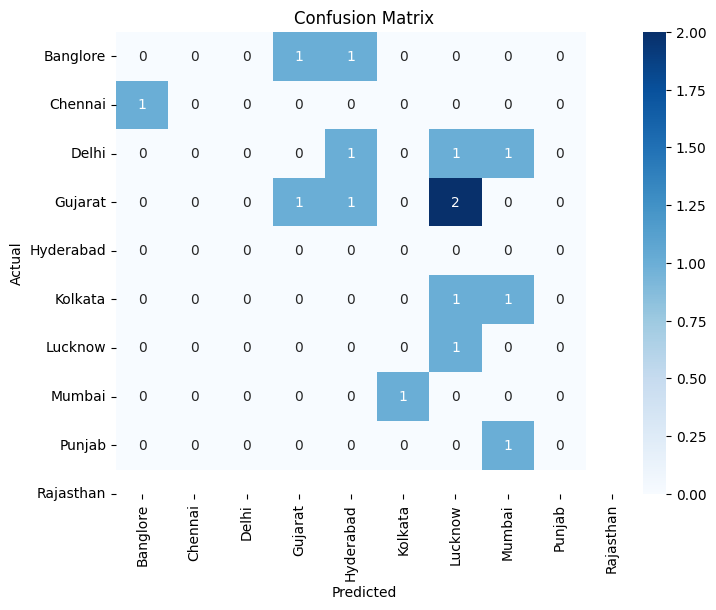

In [135]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

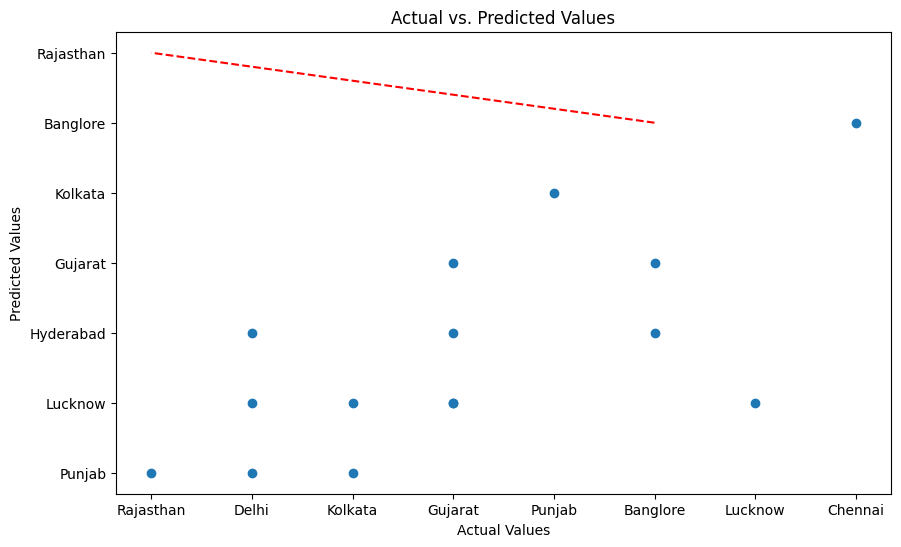

In [136]:
#SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

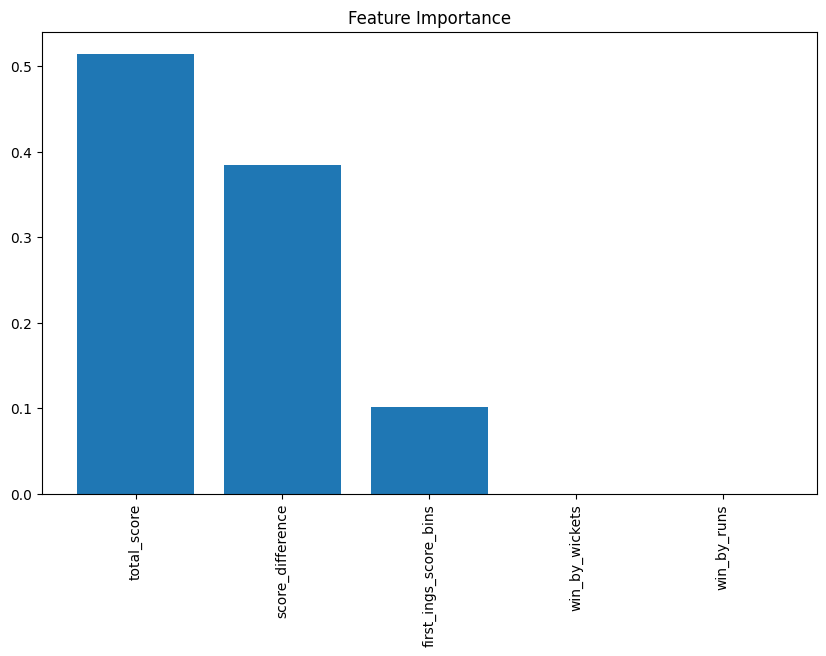

In [138]:
#RANDOM FOREST PLOT
import matplotlib.pyplot as plt
import numpy as np
# Get feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.title("Feature Importance")
plt.show()
